# Plots for end-uses 

In [1]:
import csv 
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
output_path = "../../output/"

In [21]:
timestamp_winter=[]
timestamp_summer=[]
real_power_winter = []
real_power_summer = []
reactive_power_winter = []
reactive_power_summer = []
with open(output_path+'annual_run_full_electric.csv', newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    for row in fr : 
        if '#' not in row[0] :
            if int(row[0].split('-')[1])<5 or int(row[0].split('-')[1])>=11 : 
                timestamp_winter.append(row[0])
                real_power_winter.append(float(row[1].split(' ')[0]))
                reactive_power_winter.append(float(row[2].split(' ')[0]))
            else : 
                timestamp_summer.append(row[0])
                real_power_summer.append(float(row[1].split(' ')[0]))
                reactive_power_summer.append(float(row[2].split(' ')[0]))
peak_day_winter = [timestamp_winter[real_power_winter.index(max(real_power_winter))],max(real_power_winter)]
peak_day_summer = [timestamp_summer[real_power_summer.index(max(real_power_summer))],max(real_power_summer)]
print('Peak winter day', peak_day_winter)
print('Peak summer day', peak_day_summer)



Peak winter day ['2020-04-22 08:00:00 PDT', 302.642]
Peak summer day ['2020-09-30 16:00:00 PDT', 266.347]


Assuming that the summer is defined as in PG&E May 1 - Oct 31 and winter is Nov 1 to Apr 30

In [22]:
# panel_dump_path="../paneldump/"
hvac_load_winter = []
hvac_load_summer = [] 
dryer_load_winter = []
dryer_load_summer = []
range_load_winter = [] 
range_load_summer = [] 
wh_load_winter = [] 
wh_load_summer = []

mw_winter = []
lights_winter = []
plugs_winter = []
freezer_winter = []
dw_winter = []
fridge_winter = []
cw_winter = []

mw_summer = []
lights_summer = []
plugs_summer = []
freezer_summer = []
dw_summer = []
fridge_summer = []
cw_summer = []

with open('paneldump_Full_Electric_winterpeak', newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    print( "Winter date : ", peak_day_winter[0][0:10] )
    for row in fr :
        if '#' not in row[0] or 'timestamp' not in row[0] : 
            
            if peak_day_winter[0][0:10] in row[0] and 'house_1_ELEC_UPGRADE' in row[1] :
                if 'HVAC' in row[2] : 
                    hvac_load_winter.append([row[0], row[3]])
                if 'DRYER' in row[2] :
                    dryer_load_winter.append([row[0], row[3]])
                if 'RANGE' in row[2] : 
                    range_load_winter.append([row[0], row[3]])
                if 'WATERHEATER' in row[2] : 
                    wh_load_winter.append([row[0], row[3]])
                if 'MICROWAVE' in row[2] : 
                    mw_winter.append([row[0], row[3]])
                if 'LIGHTS' in row[2] : 
                    lights_winter.append([row[0], row[3]])
                if 'PLUGS' in row[2] : 
                    plugs_winter.append([row[0], row[3]])
                if 'FREEZER' in row[2] : 
                    freezer_winter.append([row[0], row[3]])
                if 'DISHWASHER' in row[2] : 
                    dw_winter.append([row[0], row[3]])
                if 'REFRIGERATOR' in row[2] : 
                    fridge_winter.append([row[0], row[3]])
                if 'CLOTHESWASHER' in row[2] : 
                    cw_winter.append([row[0], row[3]])

                
                    
with open('paneldump_Full_Electric_summerpeak', newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    print( "Summer date : ", peak_day_summer[0][0:10] )
    for row in fr :
        if '#' not in row[0] or 'timestamp' not in row[0] : 
            if peak_day_summer[0][0:10] in row[0] and 'house_1_ELEC_UPGRADE' in row[1] :
                if 'HVAC' in row[2] : 
                    hvac_load_summer.append([row[0], row[3]])
                if 'DRYER' in row[2] :
                    dryer_load_summer.append([row[0], row[3]])
                if 'RANGE' in row[2] : 
                    range_load_summer.append([row[0], row[3]])
                if 'WATERHEATER' in row[2] : 
                    wh_load_summer.append([row[0], row[3]])
                if 'MICROWAVE' in row[2] : 
                    mw_summer.append([row[0], row[3]])
                if 'LIGHTS' in row[2] : 
                    lights_summer.append([row[0], row[3]])
                if 'PLUGS' in row[2] : 
                    plugs_summer.append([row[0], row[3]])
                if 'FREEZER' in row[2] : 
                    freezer_summer.append([row[0], row[3]])
                if 'DISHWASHER' in row[2] : 
                    dw_summer.append([row[0], row[3]])
                if 'REFRIGERATOR' in row[2] : 
                    fridge_summer.append([row[0], row[3]])
                if 'CLOTHESWASHER' in row[2] : 
                    cw_summer.append([row[0], row[3]])
            
total_winter = []
total_summer = []
timeseries_total = []


for i,enduse in enumerate(lights_winter) : 
    timeseries_total.append(lights_winter[i][0])
    total_winter.append(float(hvac_load_winter[i][1])+float(dryer_load_winter[i][1])+float(range_load_winter[i][1])+float(wh_load_winter[i][1])+float(mw_winter[i][1])+float(lights_winter[i][1])+float(plugs_winter[i][1])+float(freezer_winter[i][1])+float(dw_winter[i][1])+float(fridge_winter[i][1])+float(cw_winter[i][1]))
    total_summer.append(float(hvac_load_summer[i][1])+float(dryer_load_summer[i][1])+float(range_load_summer[i][1])+float(wh_load_summer[i][1])+float(mw_summer[i][1])+float(lights_summer[i][1])+float(plugs_summer[i][1])+float(freezer_summer[i][1])+float(dw_summer[i][1])+float(fridge_summer[i][1])+float(cw_summer[i][1]))


Winter date :  2020-04-22
Summer date :  2020-09-30


## End-use plots

### Winter peak end-use loads for a single family home

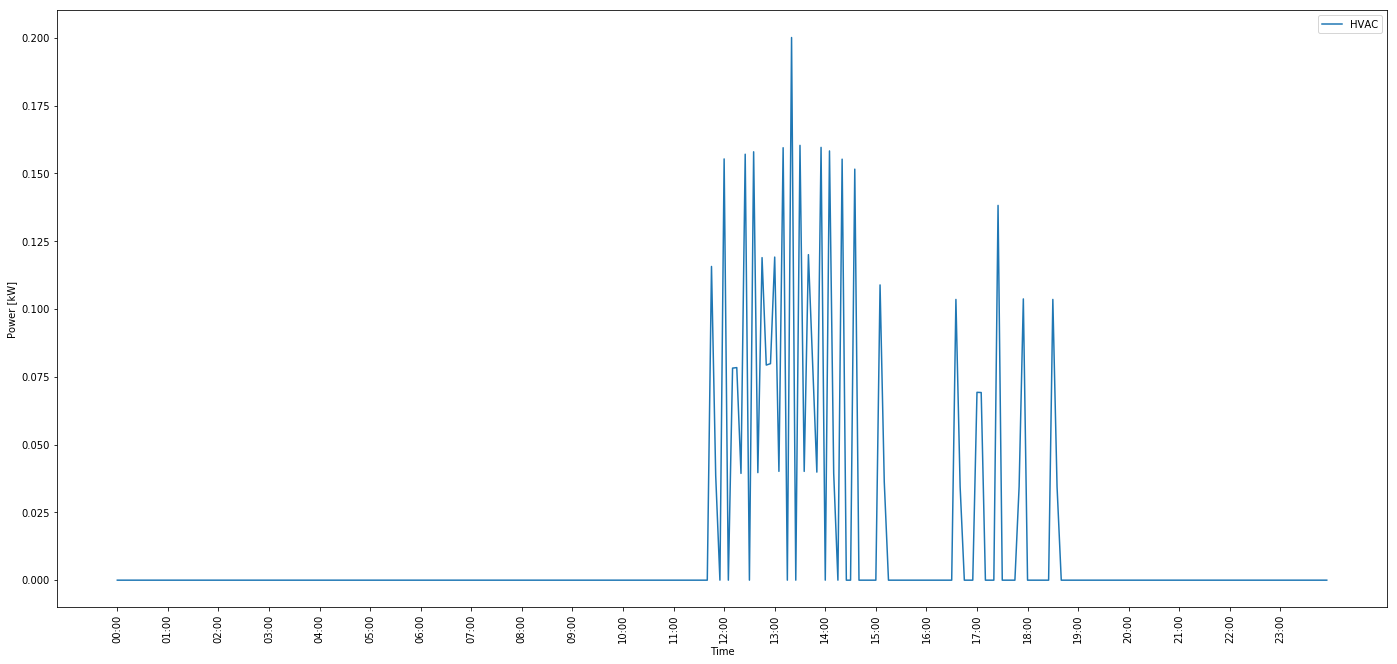

In [4]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*hvac_load_winter)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='HVAC')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/hvac_load_winter.png")

In [5]:
print('Winter maximum HVAC demand : ' + str(max(plt_value)) + ' kW')
print('Winter minimum HVAC demand : ' + str(min(plt_value))+ ' kW')

Winter maximum HVAC demand : 0.200155 kW
Winter minimum HVAC demand : 0.0 kW


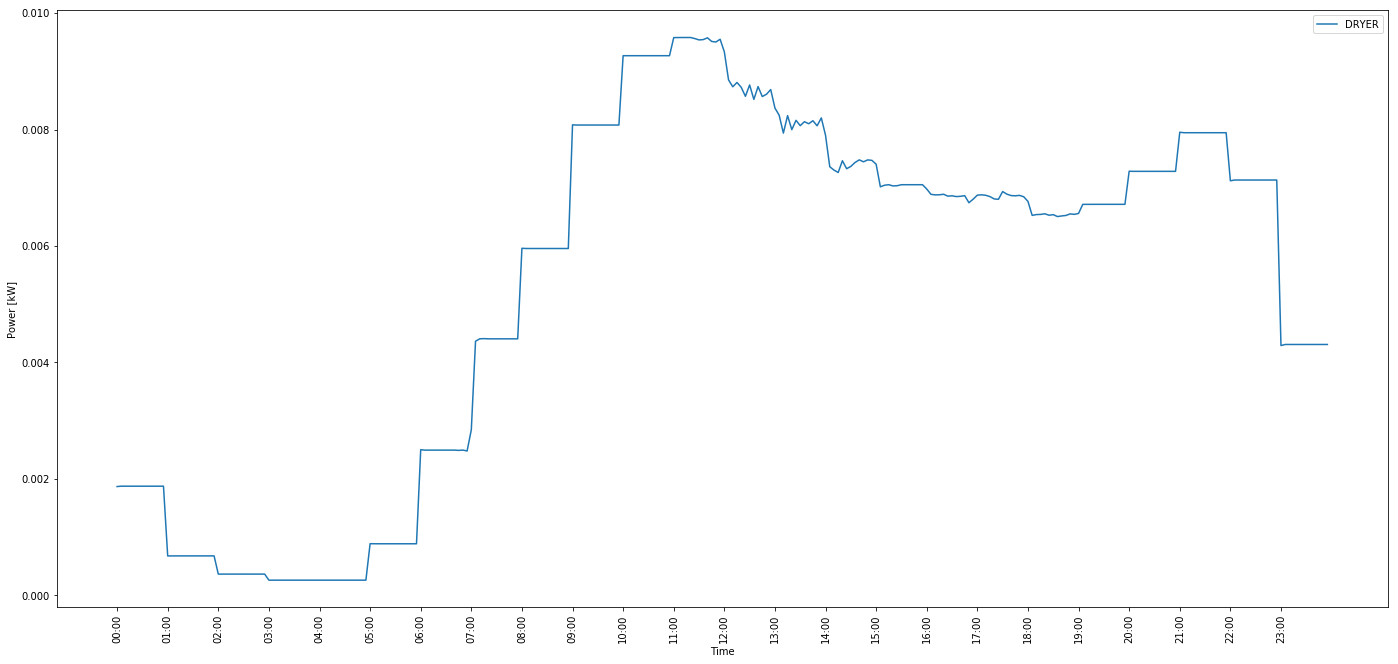

In [6]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*dryer_load_winter)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='DRYER')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/dryer_load_winter.png")

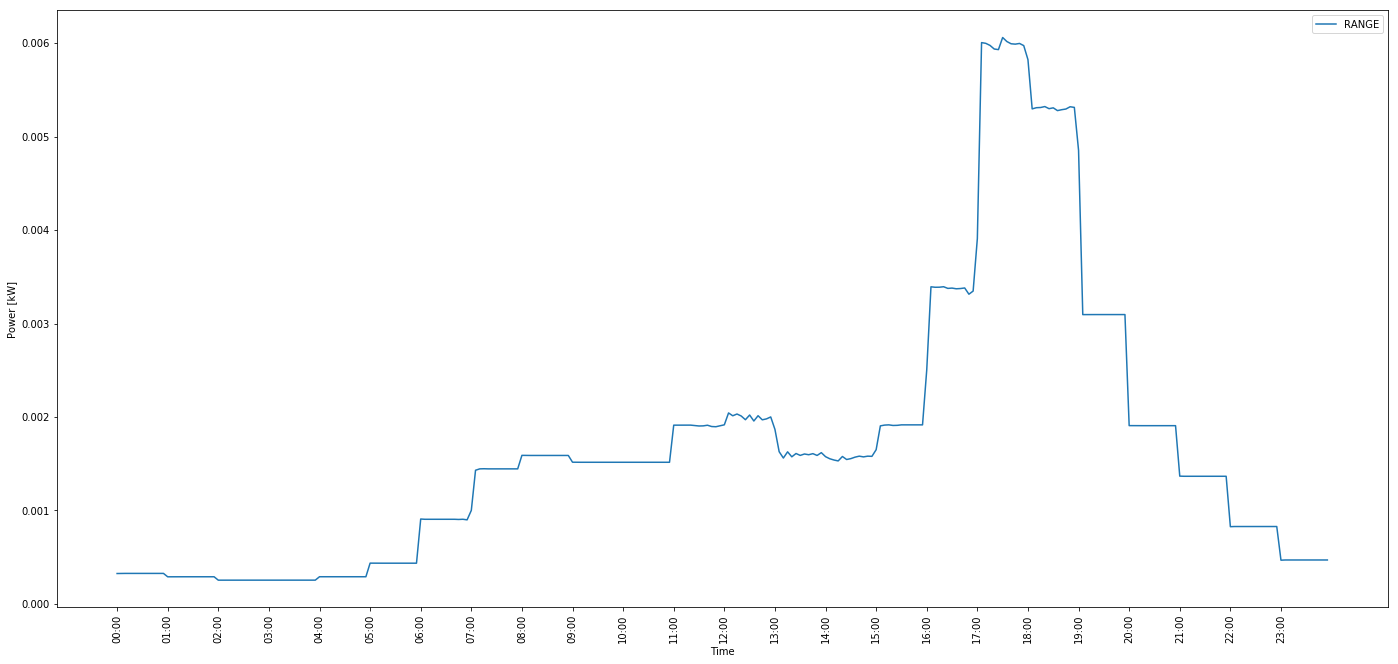

In [7]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*range_load_winter)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='RANGE')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/range_load_winter.png")

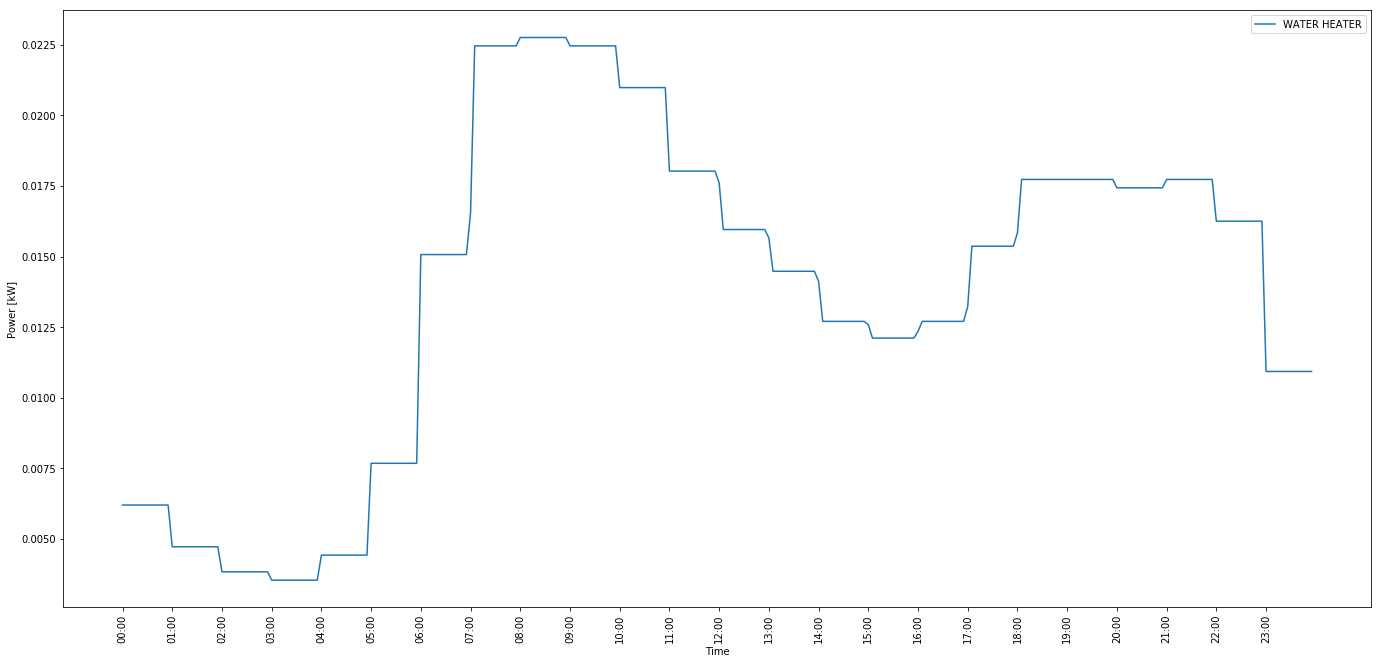

In [8]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*wh_load_winter)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='WATER HEATER')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/wh_load_winter.png")

In [9]:
print('Winter maximum HVAC demand : ' + str(max(plt_value)) + ' kW')
print('Winter minimum HVAC demand : ' + str(min(plt_value))+ ' kW')

Winter maximum HVAC demand : 0.0227541 kW
Winter minimum HVAC demand : 0.0035461 kW


### Summer peak end-use loads for a single family home 

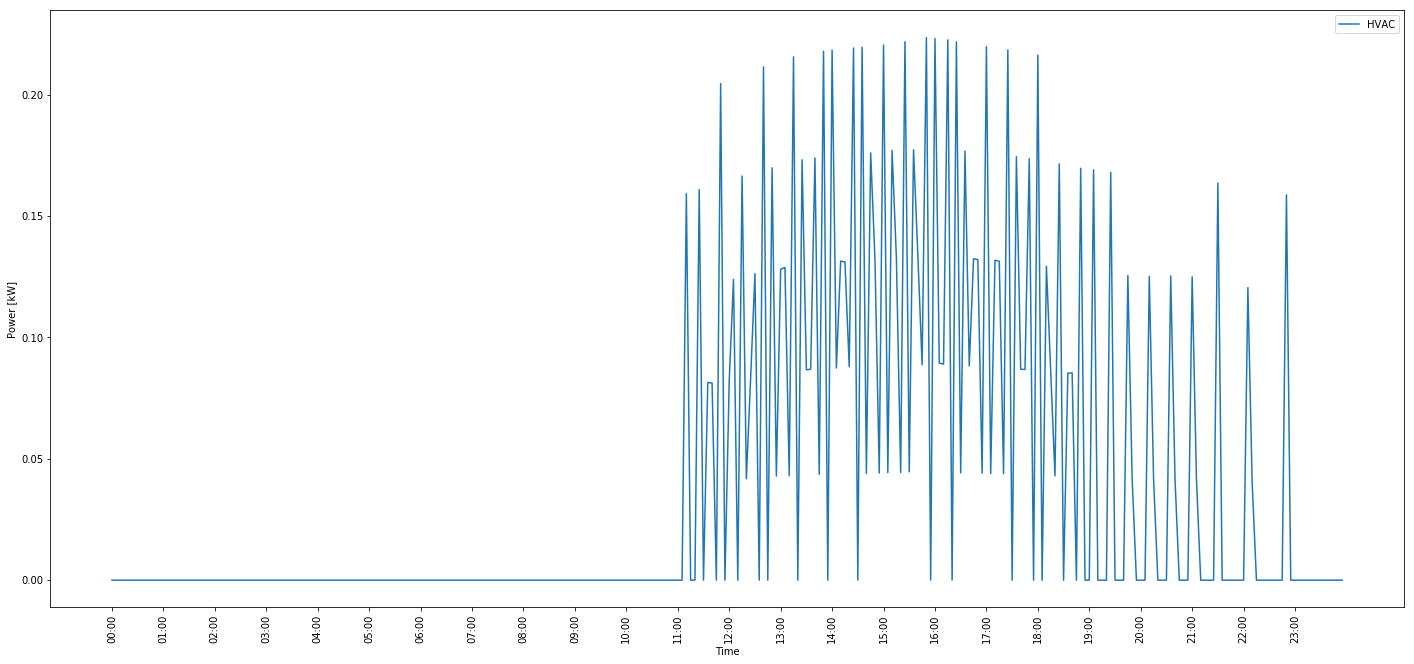

In [10]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*hvac_load_summer)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='HVAC')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
tmp_1.set_size_inches(21.5, 10.5)
plt.draw()
tmp_1.savefig("output/hvac_load_summer.png")

In [11]:
print('Summer maximum waterheater demand : ' + str(max(plt_value)) + ' kW')
print('Summer minimum waterheater demand : ' + str(min(plt_value))+ ' kW')

Summer maximum waterheater demand : 0.223513 kW
Summer minimum waterheater demand : 0.0 kW


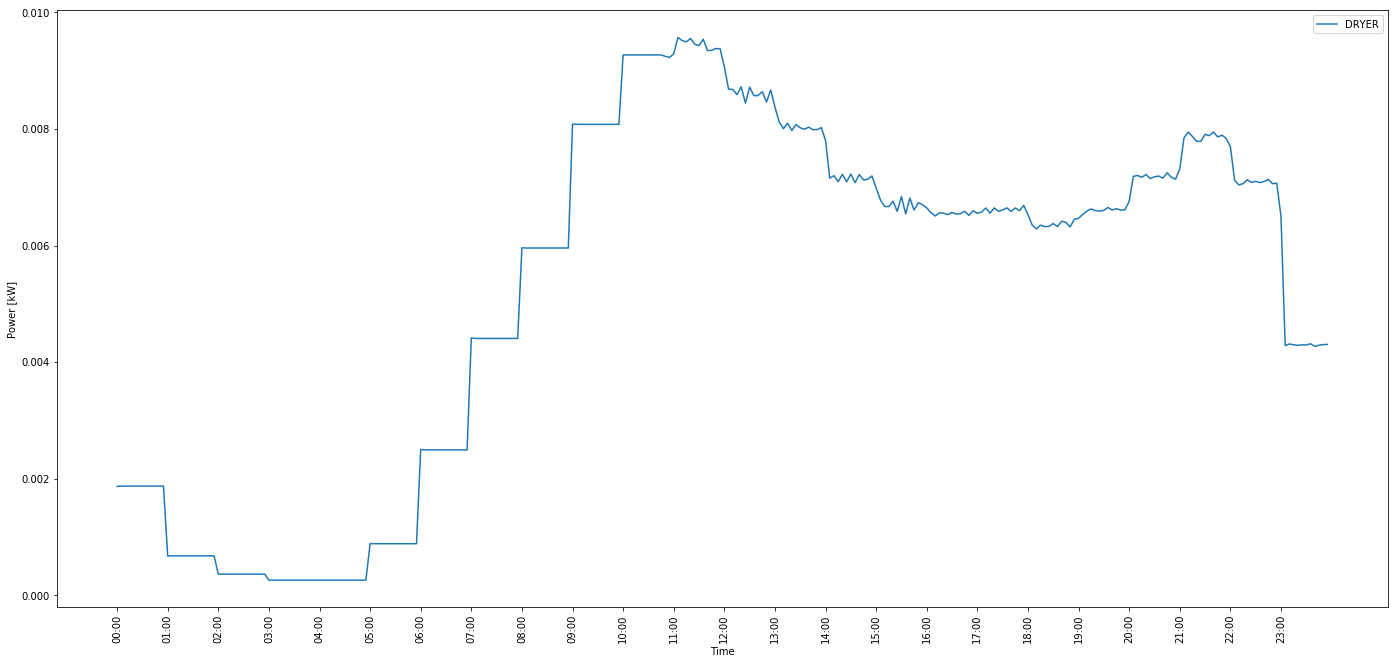

In [12]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*dryer_load_summer)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='DRYER')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/dryer_load_summer.png")

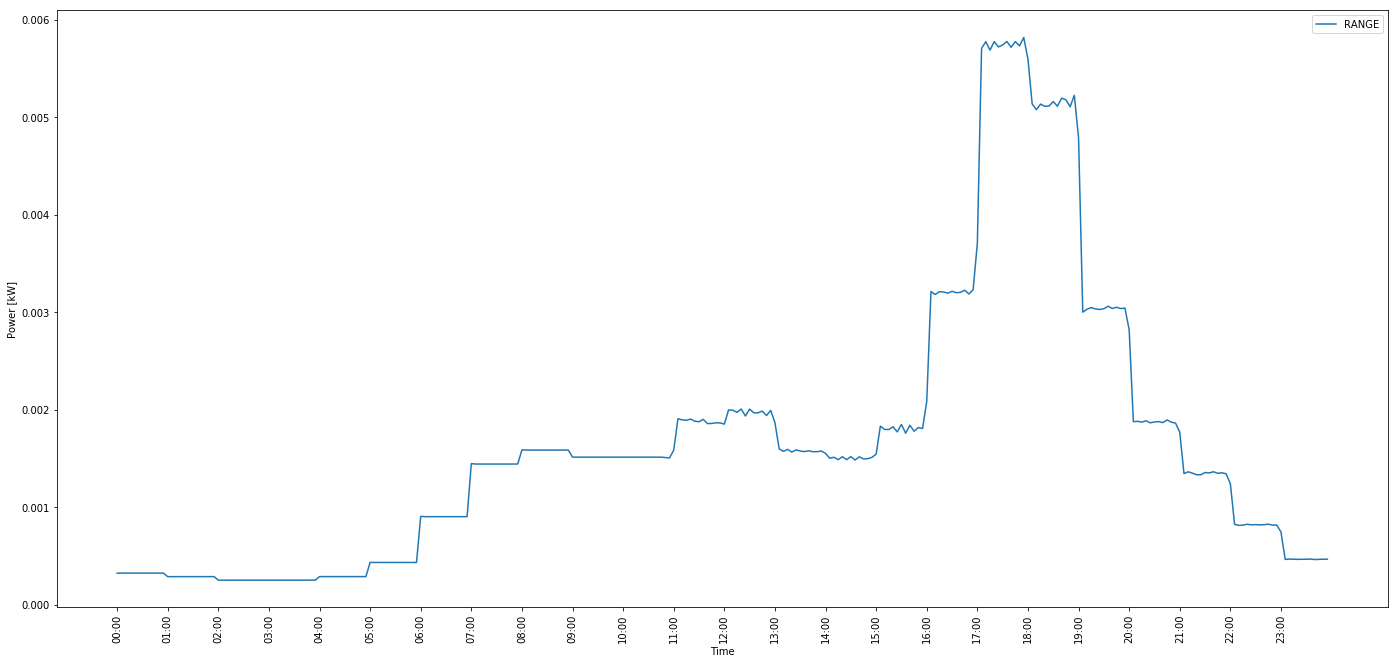

In [13]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*range_load_summer)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='RANGE')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/range_load_summer.png")

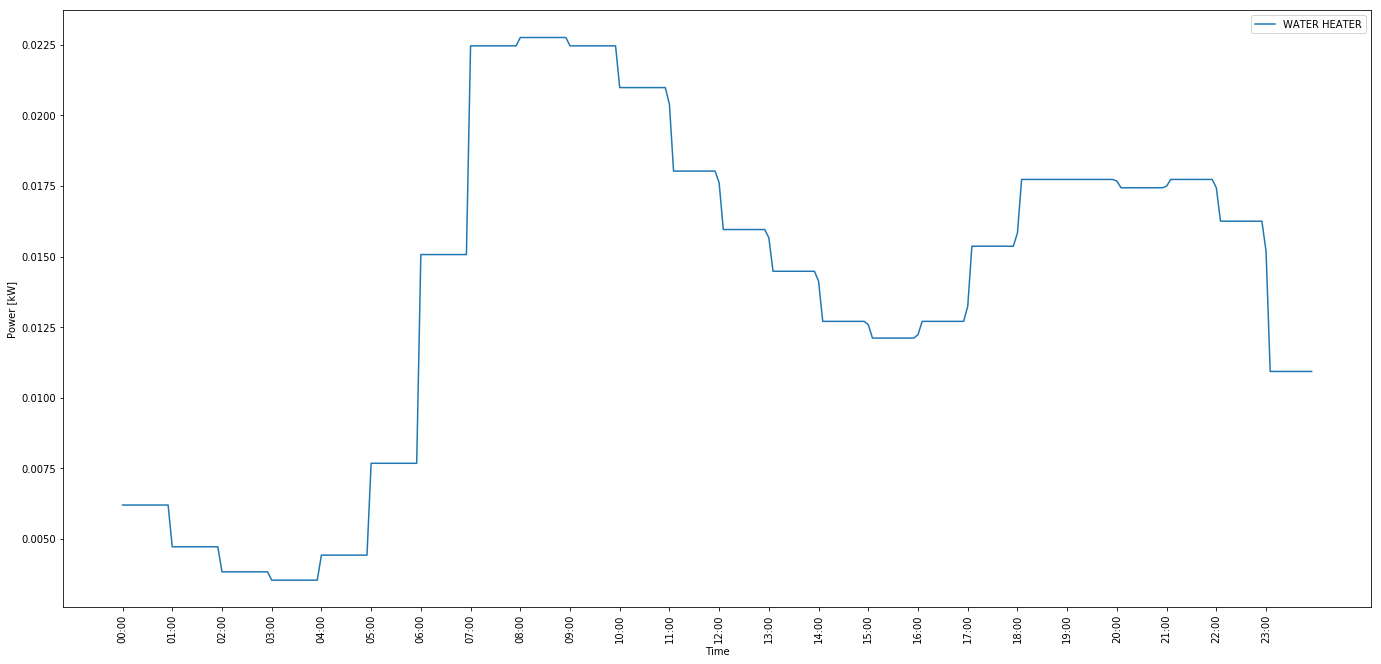

In [14]:
time_print = []
time_nozone = []
value = []
plt_time = []
plt_value = []
time,value = zip(*wh_load_summer)
plt_value = list(map(float, value)) 
for t in time : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,plt_value,label='WATER HEATER')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/wh_load_summer.png")

In [15]:
print('Summer maximum waterheater demand : ' + str(max(plt_value)) + ' kW')
print('Summer minmum waterheater demand : ' + str(min(plt_value))+ ' kW')

Summer maximum waterheater demand : 0.0227541 kW
Summer minmum waterheater demand : 0.0035461 kW


### Total load 

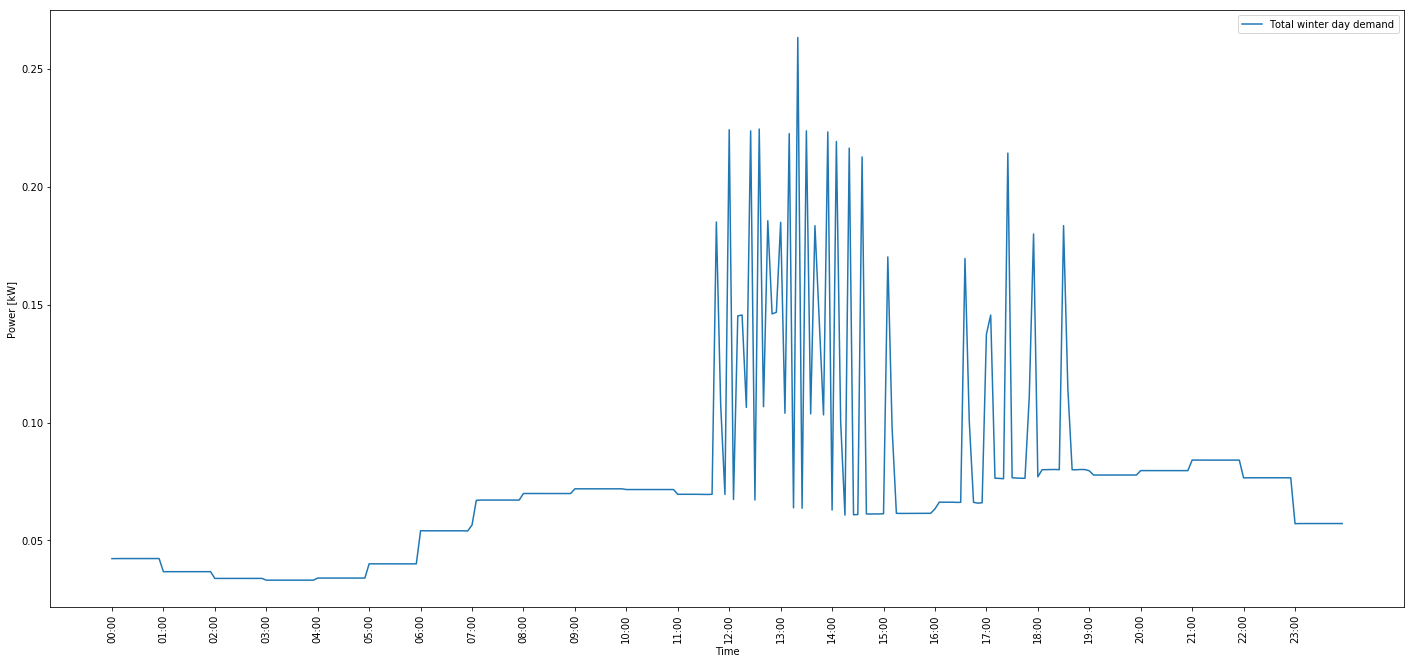

In [18]:
time_nozone = []
for t in timeseries_total : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,total_winter,label='Total winter day demand')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/total_load_winter.png")

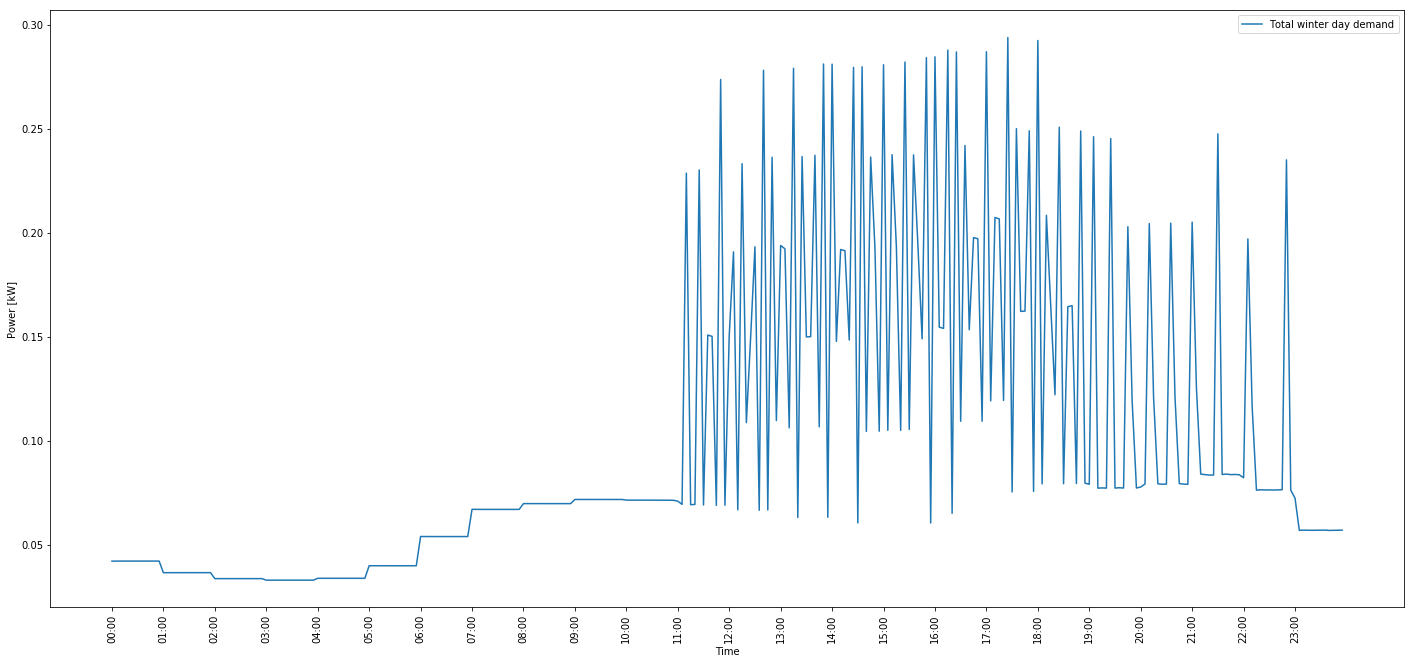

In [20]:
time_nozone = []
for t in timeseries_total : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,total_summer,label='Total winter day demand')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/total_load_summer.png")